In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def normalequation(X,Y,l):
    iden=np.identity(6,dtype=int)
    iden[0][0]=0
    I=np.linalg.inv(np.dot(X.T,X)+(l*iden))
    XY=np.dot(X.T,Y)
    W=np.dot(I,XY)
    return W

In [5]:
def load_data():
    data = pd.read_csv("Housing Price data set.csv")
    return data

def change_data(data):
    x={'yes':1,'no':0}
    for i in data.columns:
        if data[i].dtype=='object':
            data=data.drop([i],axis=1)
    return data

data=load_data()
data=change_data(data)
pricestd=data['price'].std()
pricemean=data['price'].mean()
#normalize data other than housing price
for i in data.columns:
#     if i!='price':
    data[i] = (data[i] -data[i].mean())/data[i].std()
c=[]
for i in range(len(data)):
    c.append(1)
data.insert(loc=2, column='1', value=c)
X=data.iloc[:400,2:8]
Xtest=data.iloc[400:,2:8]
Y=data.iloc[:400,1:2]
Ytest=data.iloc[400:,1:2]
X=np.array(X)
Y=np.array(Y)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)


In [6]:
def cost(prediction,Y,m,W):
    tot=(1/(2*m))*(sum((prediction-Y)*(prediction-Y)))
    return tot[0]

In [7]:
def gradient_descent(X,Y,W,l,learning_rate,epochs):
    R=[]
    m=len(Y)
    # print(W)
    prediction = []
    for i in range(epochs):
        prediction=X.dot(W)
        RR = ((learning_rate*l)/m)*W
        RR[0][0]=0 
        W = W -(1/m)*learning_rate*(X.T.dot(prediction - Y))- RR
        err=cost(prediction,Y,m,W)
        R.append(err)
        # print(err)
    return W,R

W-Normal Equation
[[-0.04585226]
 [ 0.38084328]
 [ 0.07718433]
 [ 0.2587252 ]
 [ 0.22256948]
 [ 0.19084936]]
W-Gradient Descent
[[-0.04585226]
 [ 0.38084328]
 [ 0.07718433]
 [ 0.2587252 ]
 [ 0.22256948]
 [ 0.19084936]]
Final cost of Normal Equation
0.2435303532374692
Final cost of Gradient Descent
0.24353035323746924
Epoch vs Cost


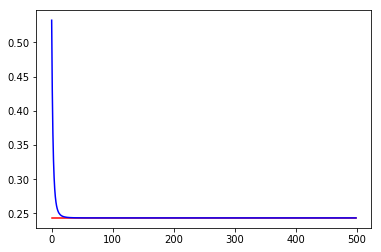

Normal Equation lambda vs cost


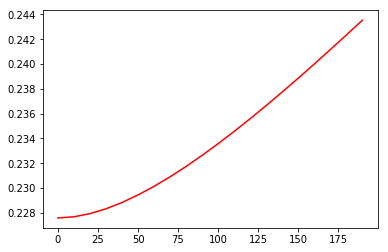

Gradient Descent lambda vs cost


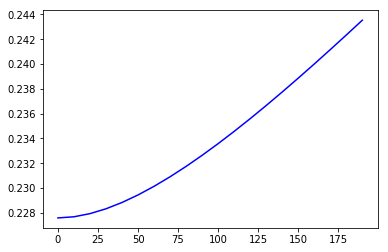

Normal Equation  lambda vs predictionerror


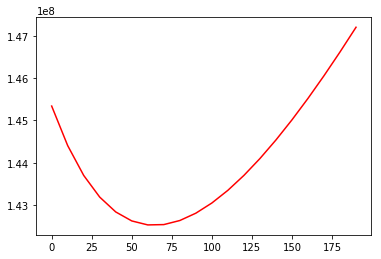

Gradient Descent lambda vs predictionerror


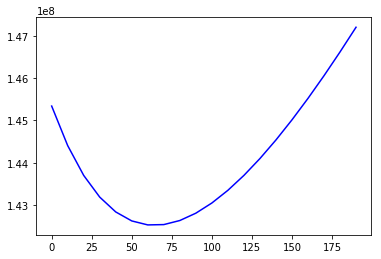

In [6]:
D=[]
for i in range(X.shape[1]):
    D.append([0])
D=np.array(D)
epoch=500
alpha=0.1
lamda=55
# print(X.shape,W.shape)
W=normalequation(X,Y,lamda)
print("W-Normal Equation")
print(W)
WG,J=gradient_descent(X,Y,D,lamda,alpha,epoch)
print("W-Gradient Descent")
print(WG)
lam=[]
n_cos=[]
n_prederror=[]
gd_cos=[]
gd_prederror=[]
for i in range(0,200,10):
    lam.append(i)
    W=normalequation(X,Y,i)
    predictedN=X.dot(W)
    errn=cost(predictedN,Y,len(Y),W)
    n_cos.append(errn)
    WG,J=gradient_descent(X,Y,D,i,alpha,epoch)
    gd_cos.append(J[-1])
    predictedN=Xtest.dot(W)
    predictedN=(predictedN*pricestd)+pricemean
    Yt=(Ytest*pricestd)+pricemean
    error=cost(predictedN,Yt,len(Yt),W)
    n_prederror.append(error)
    predicted=Xtest.dot(WG)
    predicted=(predicted*pricestd)+pricemean
    error=cost(predicted,Yt,len(Yt),W)
    gd_prederror.append(error)
predictedN=X.dot(W)
errn=cost(predictedN,Y,len(Y),W)
x=np.array([i for i in range(epoch)])
y=np.array([errn for i in range(epoch)])
print("Final cost of Normal Equation")
print(errn)
print("Final cost of Gradient Descent")
print(J[-1])
print("Epoch vs Cost")
plt.plot(x,y,'-r')
plt.plot(x,J,'-b')
plt.show()
print("Normal Equation lambda vs cost")
plt.plot(lam,n_cos,'-r')
plt.show()
print("Gradient Descent lambda vs cost")
plt.plot(lam,gd_cos,'-b')
plt.show()
print("Normal Equation  lambda vs predictionerror")
plt.plot(lam,n_prederror,'-r')
plt.show()
print("Gradient Descent lambda vs predictionerror")
plt.plot(lam,gd_prederror,'-b')
plt.show()

W-Normal Equation
[[-8.66876956e-17]
 [ 3.53565829e-01]
 [ 7.88635779e-02]
 [ 2.83273137e-01]
 [ 2.36407409e-01]
 [ 1.69705124e-01]]
W-Gradient Descent
[[-1.88453242e-16]
 [ 3.53565829e-01]
 [ 7.88635779e-02]
 [ 2.83273137e-01]
 [ 2.36407409e-01]
 [ 1.69705124e-01]]
Final cost of Normal Equation
0.22781060228136119
Final cost of Gradient Descent
0.22781060228136127
Epoch vs Cost


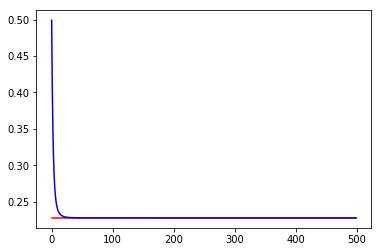

Normal Equation lambda vs cost


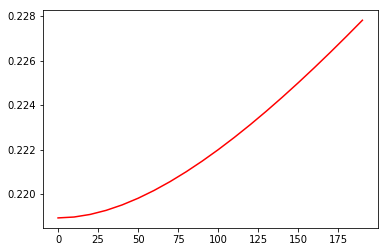

Gradient Descent lambda vs cost


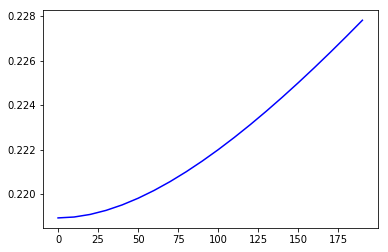

Normal Equation  lambda vs predictionerror


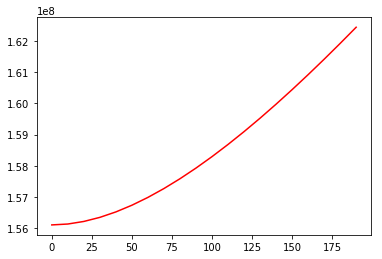

Gradient Descent lambda vs predictionerror


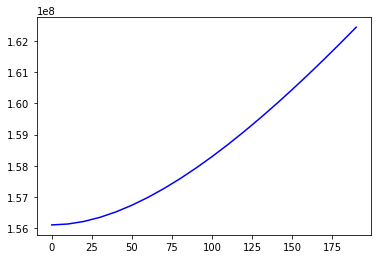

In [8]:
#Taking entire dataset for training and testing
X=data.iloc[:,2:8]
Xtest=data.iloc[:,2:8]
Y=data.iloc[:,1:2]
Ytest=data.iloc[:,1:2]
X=np.array(X)
Y=np.array(Y)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)
D=[]
for i in range(X.shape[1]):
    D.append([0])
D=np.array(D)
epoch=500
alpha=0.1
lamda=55
# print(X.shape,W.shape)
W=normalequation(X,Y,lamda)
print("W-Normal Equation")
print(W)
WG,J=gradient_descent(X,Y,D,lamda,alpha,epoch)
print("W-Gradient Descent")
print(WG)
lam=[]
n_cos=[]
n_prederror=[]
gd_cos=[]
gd_prederror=[]
for i in range(0,200,10):
    lam.append(i)
    W=normalequation(X,Y,i)
    predictedN=X.dot(W)
    errn=cost(predictedN,Y,len(Y),W)
    n_cos.append(errn)
    WG,J=gradient_descent(X,Y,D,i,alpha,epoch)
    gd_cos.append(J[-1])
    predictedN=Xtest.dot(W)
    predictedN=(predictedN*pricestd)+pricemean
    Yt=(Ytest*pricestd)+pricemean
    error=cost(predictedN,Yt,len(Yt),W)
    n_prederror.append(error)
    predicted=Xtest.dot(WG)
    predicted=(predicted*pricestd)+pricemean
    error=cost(predicted,Yt,len(Yt),W)
    gd_prederror.append(error)
predictedN=X.dot(W)
errn=cost(predictedN,Y,len(Y),W)
x=np.array([i for i in range(epoch)])
y=np.array([errn for i in range(epoch)])
print("Final cost of Normal Equation")
print(errn)
print("Final cost of Gradient Descent")
print(J[-1])
print("Epoch vs Cost")
plt.plot(x,y,'-r')
plt.plot(x,J,'-b')
plt.show()
print("Normal Equation lambda vs cost")
plt.plot(lam,n_cos,'-r')
plt.show()
print("Gradient Descent lambda vs cost")
plt.plot(lam,gd_cos,'-b')
plt.show()
print("Normal Equation  lambda vs predictionerror")
plt.plot(lam,n_prederror,'-r')
plt.show()
print("Gradient Descent lambda vs predictionerror")
plt.plot(lam,gd_prederror,'-b')
plt.show()